# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# optimizer

## SGD
バッチ正規化を有効にした。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.23
                : 10. 正答率(テスト) = 0.1606
Generation: 20. 正答率(トレーニング) = 0.2
                : 20. 正答率(テスト) = 0.1872
Generation: 30. 正答率(トレーニング) = 0.28
                : 30. 正答率(テスト) = 0.2788
Generation: 40. 正答率(トレーニング) = 0.43
                : 40. 正答率(テスト) = 0.386
Generation: 50. 正答率(トレーニング) = 0.41
                : 50. 正答率(テスト) = 0.3978
Generation: 60. 正答率(トレーニング) = 0.53
                : 60. 正答率(テスト) = 0.4352
Generation: 70. 正答率(トレーニング) = 0.34
                : 70. 正答率(テスト) = 0.4133
Generation: 80. 正答率(トレーニング) = 0.38
                : 80. 正答率(テスト) = 0.3936
Generation: 90. 正答率(トレーニング) = 0.41
                : 90. 正答率(テスト) = 0.3662
Generation: 100. 正答率(トレーニング) = 0.31
                : 100. 正答率(テスト) = 0.3849
Generation: 110. 正答率(トレーニング) = 0.46
                : 110. 正答率(テスト) = 0.3906
Generation: 120. 正答率(トレーニング) = 0.41
                : 120. 正答率(テスト) = 0.403
Generation: 130. 正答率(トレーニング) = 0.34
                : 130. 正答率(テスト) = 0.3823
Generation

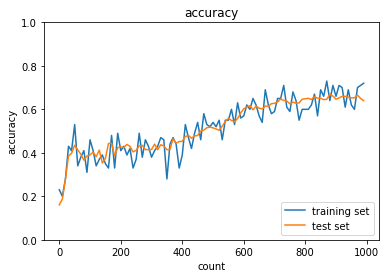

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

→ある低度学習が進んだが、まだ正答率が低い。

## Momentum
バッチ正規化を有効にした。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1807
Generation: 20. 正答率(トレーニング) = 0.32
                : 20. 正答率(テスト) = 0.3051
Generation: 30. 正答率(トレーニング) = 0.44
                : 30. 正答率(テスト) = 0.4225
Generation: 40. 正答率(トレーニング) = 0.46
                : 40. 正答率(テスト) = 0.3467
Generation: 50. 正答率(トレーニング) = 0.41
                : 50. 正答率(テスト) = 0.404
Generation: 60. 正答率(トレーニング) = 0.45
                : 60. 正答率(テスト) = 0.453
Generation: 70. 正答率(トレーニング) = 0.45
                : 70. 正答率(テスト) = 0.5028
Generation: 80. 正答率(トレーニング) = 0.65
                : 80. 正答率(テスト) = 0.5602
Generation: 90. 正答率(トレーニング) = 0.6
                : 90. 正答率(テスト) = 0.6231
Generation: 100. 正答率(トレーニング) = 0.59
                : 100. 正答率(テスト) = 0.6419
Generation: 110. 正答率(トレーニング) = 0.57
                : 110. 正答率(テスト) = 0.6239
Generation: 120. 正答率(トレーニング) = 0.62
                : 120. 正答率(テスト) = 0.6189
Generation: 130. 正答率(トレーニング) = 0.64
                : 130. 正答率(テスト) = 0.616
Generation:

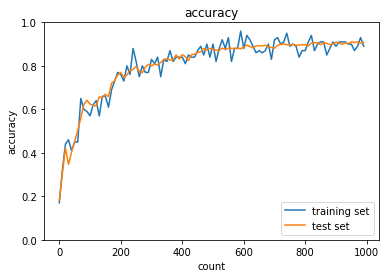

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

→正答率が高く学習がうまくいった。

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

バッチ正規化を有効にした。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.31
                : 10. 正答率(テスト) = 0.2131
Generation: 20. 正答率(トレーニング) = 0.37
                : 20. 正答率(テスト) = 0.2632
Generation: 30. 正答率(トレーニング) = 0.34
                : 30. 正答率(テスト) = 0.2889
Generation: 40. 正答率(トレーニング) = 0.33
                : 40. 正答率(テスト) = 0.3336
Generation: 50. 正答率(トレーニング) = 0.37
                : 50. 正答率(テスト) = 0.4179
Generation: 60. 正答率(トレーニング) = 0.52
                : 60. 正答率(テスト) = 0.4857
Generation: 70. 正答率(トレーニング) = 0.5
                : 70. 正答率(テスト) = 0.5629
Generation: 80. 正答率(トレーニング) = 0.53
                : 80. 正答率(テスト) = 0.5808
Generation: 90. 正答率(トレーニング) = 0.6
                : 90. 正答率(テスト) = 0.6289
Generation: 100. 正答率(トレーニング) = 0.65
                : 100. 正答率(テスト) = 0.6092
Generation: 110. 正答率(トレーニング) = 0.56
                : 110. 正答率(テスト) = 0.6006
Generation: 120. 正答率(トレーニング) = 0.6
                : 120. 正答率(テスト) = 0.6163
Generation: 130. 正答率(トレーニング) = 0.69
                : 130. 正答率(テスト) = 0.638
Generation:

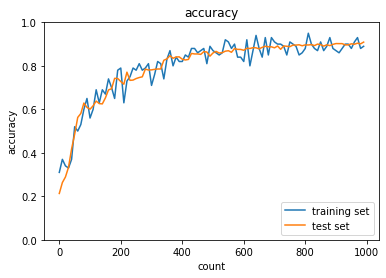

In [8]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RSMprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.22
                : 20. 正答率(テスト) = 0.2045
Generation: 30. 正答率(トレーニング) = 0.34
                : 30. 正答率(テスト) = 0.2053
Generation: 40. 正答率(トレーニング) = 0.32
                : 40. 正答率(テスト) = 0.2578
Generation: 50. 正答率(トレーニング) = 0.32
                : 50. 正答率(テスト) = 0.3106
Generation: 60. 正答率(トレーニング) = 0.39
                : 60. 正答率(テスト) = 0.3394
Generation: 70. 正答率(トレーニング) = 0.5
                : 70. 正答率(テスト) = 0.3451
Generation: 80. 正答率(トレーニング) = 0.52
                : 80. 正答率(テスト) = 0.3923
Generation: 90. 正答率(トレーニング) = 0.46
                : 90. 正答率(テスト) = 0.437
Generation: 100. 正答率(トレーニング) = 0.5
                : 100. 正答率(テスト) = 0.4248
Generation: 110. 正答率(トレーニング) = 0.59
                : 110. 正答率(テスト) = 0.5261
Generation: 120. 正答率(トレーニング) = 0.65
                : 120. 正答率(テスト) = 0.5349
Generation: 130. 正答率(トレーニング) = 0.7
                : 130. 正答率(テスト) = 0.5299
Generation:

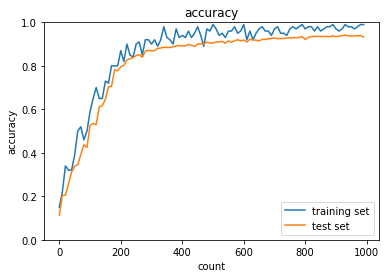

In [9]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

→バッチ正規化なしでも学習が進んだ

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1327
Generation: 30. 正答率(トレーニング) = 0.18
                : 30. 正答率(テスト) = 0.2125
Generation: 40. 正答率(トレーニング) = 0.23
                : 40. 正答率(テスト) = 0.2133
Generation: 50. 正答率(トレーニング) = 0.2
                : 50. 正答率(テスト) = 0.2312
Generation: 60. 正答率(トレーニング) = 0.25
                : 60. 正答率(テスト) = 0.2712
Generation: 70. 正答率(トレーニング) = 0.24
                : 70. 正答率(テスト) = 0.286
Generation: 80. 正答率(トレーニング) = 0.31
                : 80. 正答率(テスト) = 0.339
Generation: 90. 正答率(トレーニング) = 0.32
                : 90. 正答率(テスト) = 0.3269
Generation: 100. 正答率(トレーニング) = 0.38
                : 100. 正答率(テスト) = 0.3341
Generation: 110. 正答率(トレーニング) = 0.5
                : 110. 正答率(テスト) = 0.4274
Generation: 120. 正答率(トレーニング) = 0.55
                : 120. 正答率(テスト) = 0.5111
Generation: 130. 正答率(トレーニング) = 0.5
                : 130. 正答率(テスト) = 0.5206
Generation: 

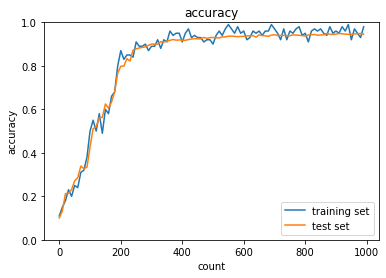

In [10]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

→バッチ正規化なしでも学習が進んだ。正答率（テスト）がRSMpropよりわずかに高くなった。

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう
Adamでバッチ正規化したケース

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.24
                : 10. 正答率(テスト) = 0.2935
Generation: 20. 正答率(トレーニング) = 0.46
                : 20. 正答率(テスト) = 0.3961
Generation: 30. 正答率(トレーニング) = 0.55
                : 30. 正答率(テスト) = 0.5628
Generation: 40. 正答率(トレーニング) = 0.64
                : 40. 正答率(テスト) = 0.674
Generation: 50. 正答率(トレーニング) = 0.74
                : 50. 正答率(テスト) = 0.7114
Generation: 60. 正答率(トレーニング) = 0.7
                : 60. 正答率(テスト) = 0.7418
Generation: 70. 正答率(トレーニング) = 0.68
                : 70. 正答率(テスト) = 0.7626
Generation: 80. 正答率(トレーニング) = 0.74
                : 80. 正答率(テスト) = 0.7872
Generation: 90. 正答率(トレーニング) = 0.83
                : 90. 正答率(テスト) = 0.8131
Generation: 100. 正答率(トレーニング) = 0.83
                : 100. 正答率(テスト) = 0.8377
Generation: 110. 正答率(トレーニング) = 0.83
                : 110. 正答率(テスト) = 0.8422
Generation: 120. 正答率(トレーニング) = 0.87
                : 120. 正答率(テスト) = 0.8399
Generation: 130. 正答率(トレーニング) = 0.86
                : 130. 正答率(テスト) = 0.8605
Generatio

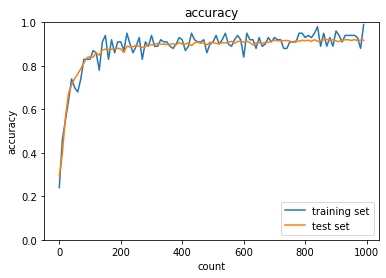

In [11]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()